## Phân tích dữ liệu các môn Khoa học Xã hội

In [2]:
!which python 

/d/miniconda3/envs/p4ds-env/python


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('diemthi2019_update.csv').drop(columns="Unnamed: 0")
df.head()

,SBD,Ngu Van,Toan Hoc,Ma Ngoai Ngu,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
0,24008611,8.00,8.2,N1,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,51000032,6.17,8.6,N1,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,51000005,4.75,5.2,NaN,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,51000021,4.50,4.4,NaN,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,51000013,6.00,5.8,N1,4.4,NaN,NaN,NaN,7.75,8.25,7.50


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột

Dữ liệu có 811,851 dòng và 11 cột. Mỗi dòng là một học sinh với điểm thi THPT tương ứng

In [5]:
print("Rows:", df.shape[0])
print("Cols:", df.shape[1])

Rows: 811851
Cols: 11


### Dữ liệu có các dòng bị lặp không?

Các dòng không có dữ liệu bị lặp dựa trên Số Báo Danh

In [6]:
id_duplicated = df[df.duplicated(['SBD'], keep=False)]
print("No. duplicate:", len(id_duplicated))
id_duplicated

No. duplicate: 0


,SBD,Ngu Van,Toan Hoc,Ma Ngoai Ngu,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD


### Mỗi cột có ý nghĩa gì?

Ta có 11 cột bao gồm:
* SBD: Số báo danh của học sinh trong kỳ thi
* Ngu Van: Điểm môn thi Ngữ Văn
* Toan Hoc: Điểm môn thi Toán Học
* Ma Ngoai Ngu: Mã đối với các môn thi Ngoại Ngữ trong đó:
    - N1: Tiếng Anh
    - N2: Tiếng Nga
    - N3: Tiếng Pháp
    - N4: Tiếng Trung
    - N5: Tiếng Đức
    - N6: Tiếng Nhật
* Ngoai Ngu: Điểm môn thi Ngoại Ngữ
* Vat Ly: Điểm môn thi Vật Lý
* Hoa Hoc: Điểm môn thi Hóa Học
* Sinh Hoc: Điểm môn thi Sinh Học
* Lich Su: Điểm môn thi Lịch Sử
* Dia Ly: Điểm môn thi Địa Lý
* GDCD: Điểm môn thi GDCD

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Các cột điểm thi đều có kiểu dữ liệu `float64`. Riêng cột `SBD` là `int64` và `Ma Ngoai Ngu` là `string`. Đây là các kiểu dữ liệu phù hợp để xử lý.

In [7]:
df.dtypes

SBD               int64
Ngu Van         float64
Toan Hoc        float64
Ma Ngoai Ngu     object
Ngoai Ngu       float64
Vat Ly          float64
Hoa Hoc         float64
Sinh Hoc        float64
Lich Su         float64
Dia Ly          float64
GDCD            float64
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [8]:
df = df.set_index("SBD")

#### Giá trị min/max của các cột

Ta có thể thấy, tất cả các cột số (các cột điểm thi môn học) đều có giá trị nhỏ nhất là 0 điểm và giá trị lớn nhất là 10 điểm (riêng môn Ngữ Văn không có điểm 10 mà chỉ đến 9.5). Vậy tức là dù ở môn nào, vẫn có học sinh bị điểm 0?

In [9]:
df.describe()

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
count,799208.000000,807762.000000,728513.000000,292166.000000,295544.000000,291199.000000,542729.000000,535897.000000,470905.000000
mean,5.442390,5.573748,4.240692,5.563926,5.342898,4.665719,4.293683,5.988069,7.353802
std,1.353822,1.758361,1.750507,1.619208,1.594621,1.247124,1.439408,1.232252,1.270562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.670000,4.200000,3.000000,4.500000,4.250000,3.750000,3.250000,5.250000,6.500000
50%,5.500000,5.600000,3.800000,5.750000,5.500000,4.500000,4.000000,6.000000,7.500000
75%,6.500000,7.000000,5.200000,6.750000,6.500000,5.250000,5.000000,6.750000,8.250000
max,9.500000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### Tỷ lệ giá trị thiếu của các cột điểm thi và mã ngoại ngữ

Ta có thể thấy các môn có tỉ lệ các giá trị thiếu ít nhất là các môn bắt buộc Toán, Ngữ văn và Ngoại Ngữ.

Nhóm môn Xã Hội nhìn chung có tỉ lệ giá trị thiếu (30%-40%) ít hơn nhóm môn Tự Nhiên (~65%)

Điều này làm ta tự hỏi:
* Tại sao các môn Tự Nhiên lại có tỷ lệ thiếu cao như vậy
* Liệu một học sinh có thể không tham gia thi cả hai nhóm môn Xã Hội và Tự nhiên?
* Có bao nhiêu học sinh bỏ thi hoàn toàn? Hoặc chỉ thi 1 hoặc 2 môn

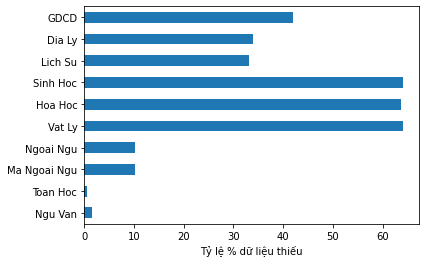

In [10]:
def missing_ratio(x):
    return round(x.isnull().sum()/len(x) * 100, 2)
df.agg(missing_ratio).plot.barh()
plt.xlabel("Tỷ lệ % dữ liệu thiếu")
plt.show()

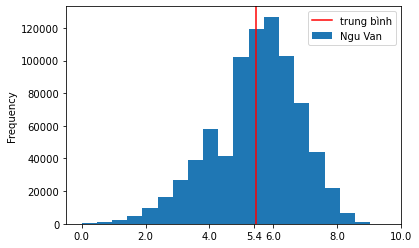

In [11]:
nv_series = df["Ngu Van"]
nv_series.plot.hist(bins=20)
plt.axvline(x=nv_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(nv_series.mean(),1)])
plt.legend()
plt.show()

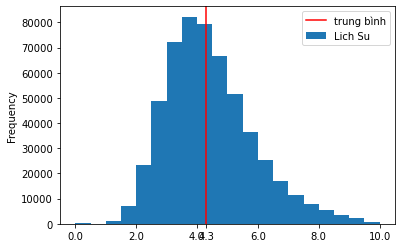

In [12]:
ls_series = df["Lich Su"]
ls_series.plot.hist(bins=20)
plt.axvline(x=ls_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(ls_series.mean(),1)])
plt.legend()
plt.show()

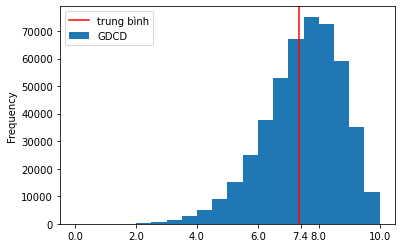

In [13]:
cd_series = df["GDCD"]
cd_series.plot.hist(bins=20)
plt.axvline(x=cd_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(cd_series.mean(),1)])
plt.legend()
plt.show()

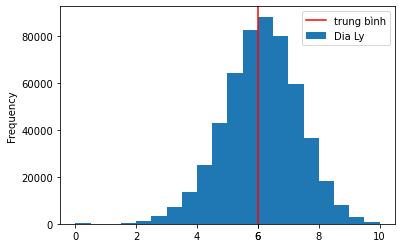

In [14]:
dl_series = df["Dia Ly"]
dl_series.plot.hist(bins=20)
plt.axvline(x=dl_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(dl_series.mean(),1)])
plt.legend()
plt.show()

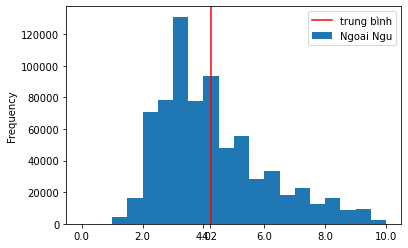

In [15]:
nn_series = df["Ngoai Ngu"]
nn_series.plot.hist(bins=20)
plt.axvline(x=nn_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(nn_series.mean(),1)])
plt.legend()
plt.show()

In [16]:
df["Ma Ngoai Ngu"].value_counts()

N1    726064
N4       801
N6       773
N3       646
N2       148
N5        81
Name: Ma Ngoai Ngu, dtype: int64

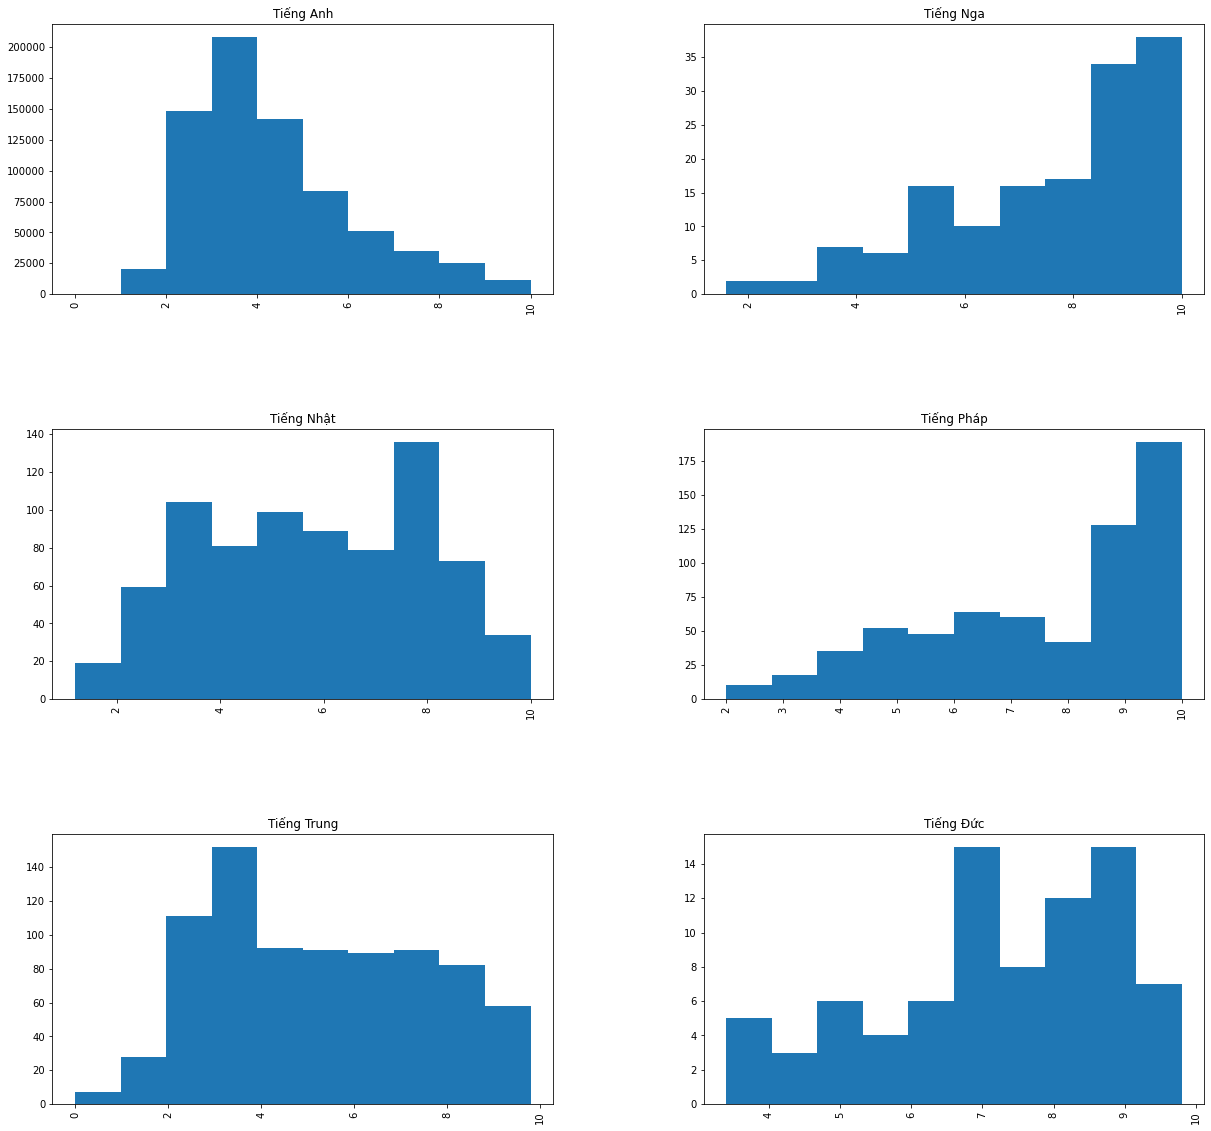

In [17]:
nn_dict = {
    "N1": "Tiếng Anh",
    "N2": "Tiếng Nga",
    "N3": "Tiếng Pháp",
    "N4": "Tiếng Trung",
    "N5": "Tiếng Đức",
    "N6": "Tiếng Nhật",
}
nn_df = pd.DataFrame(df[["Ngoai Ngu", "Ma Ngoai Ngu"]]).replace(nn_dict)

nn_df["Ngoai Ngu"].hist(by=nn_df["Ma Ngoai Ngu"], figsize=(20,20), bins=10)
plt.show()

Khi biểu diễn tương quan giữa các khoa học xã hội, ta thấy:
- Nhóm môn Lịch Sử, Địa Lý và GDCD có sự tương quan mạnh với nhau, có vẻ như các học sinh học tổ hợp này ôn đều cho 3 môn

In [18]:
def _color_red_or_green(val):
    if val < 0.4:
        color = 'red'
    elif val < 0.5:
        color = 'orange'
    else:
        color = 'green'
    return 'background-color: %s' % color

khxh_col = ["Ngu Van","Ngoai Ngu","Lich Su", "Dia Ly", "GDCD"]
khxh_df = df[khxh_col]
khxh_df.corr().style.applymap(_color_red_or_green)

,Ngu Van,Ngoai Ngu,Lich Su,Dia Ly,GDCD
Ngu Van,1.000000,0.412665,0.445274,0.494857,0.456214
Ngoai Ngu,0.412665,1.000000,0.328869,0.344333,0.318517
Lich Su,0.445274,0.328869,1.000000,0.601641,0.500582
Dia Ly,0.494857,0.344333,0.601641,1.000000,0.583849
GDCD,0.456214,0.318517,0.500582,0.583849,1.000000


## Câu hỏi 2: Tỷ lệ rớt tốt nghiệp năm 2019 dựa trên điểm liệt

Lợi ích: Phân tích nguyên nhân rớt tốt nghiệp từ đó củng cố các giảng dạy

Bộ giáo dục quy định một bài dưới 1 điểm cũng đồng nghĩa với việc học sinh đó đã rớt tốt nghiệp.

In [19]:
score_df = df.drop(columns="Ma Ngoai Ngu")
grad_df = score_df.copy()
grad_df["Tot Nghiep"] = ~(np.any((score_df <= 1.0) & (score_df != np.nan), axis=1) | np.any(score_df[["Toan Hoc", "Ngoai Ngu", "Ngu Van"]].isnull(), axis=1))
grad_df["So Mon Liet"] = np.sum(((score_df <= 1.0) & (score_df != np.nan)), axis=1) + np.sum(score_df[["Toan Hoc", "Ngoai Ngu", "Ngu Van"]].isnull(), axis=1)

In [20]:
grad_df[grad_df["Tot Nghiep"] == False]

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Tot Nghiep,So Mon Liet
SBD,,,,,,,,,,,
51000005,4.75,5.2,NaN,NaN,NaN,NaN,4.00,4.25,5.75,False,1
51000021,4.50,4.4,NaN,NaN,NaN,NaN,2.25,4.75,5.00,False,1
51000001,5.75,2.2,NaN,NaN,NaN,NaN,3.25,NaN,NaN,False,1
51000020,5.00,5.8,NaN,NaN,NaN,NaN,5.00,NaN,NaN,False,1
51000042,4.25,NaN,NaN,NaN,NaN,NaN,3.25,7.50,NaN,False,2
...,...,...,...,...,...,...,...,...,...,...,...
26018826,3.00,4.2,1.0,NaN,NaN,NaN,4.25,4.00,7.25,False,1
26018880,NaN,5.8,3.6,NaN,NaN,NaN,4.75,7.25,9.25,False,1
26018937,6.50,5.8,4.0,1.00,3.5,3.25,NaN,NaN,NaN,False,1


Ta có thể thấy tỉ lệ rớt tốt nghiệp do điểm liệt của năm 2019 là khoảng 11%. Trong đó, liệt do 1 môn chiếm 82% còn liệt do 2 môn chiếm 17%

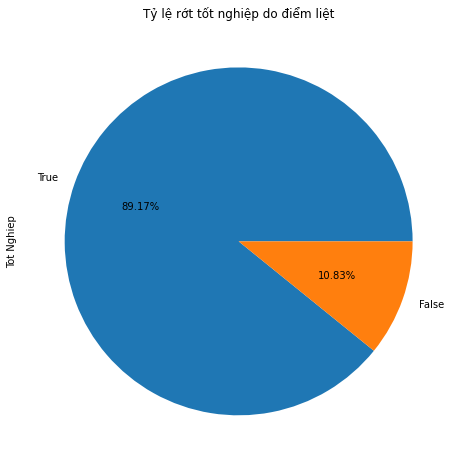

In [21]:
grad_df["Tot Nghiep"].value_counts().plot.pie(figsize=(8, 8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("Tỷ lệ rớt tốt nghiệp do điểm liệt")
plt.show()

Ta có thể xem chi tiết về số lượng các môn bị điểm liệt, có vẻ như số lượng học sinh bị một hoặc hai môn điểm liệt chiếm đa số. Ta hãy thử dùng pie chart để biểu diễn trực quan hơn tỷ lệ này

In [22]:
grad_df["So Mon Liet"].value_counts()

0    723951
1     72562
2     14872
3       257
5        99
6        62
4        46
8         2
Name: So Mon Liet, dtype: int64

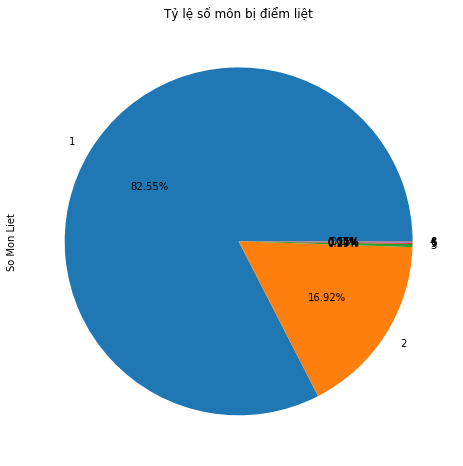

In [27]:
grad_df["So Mon Liet"].value_counts()[1:].plot.pie(figsize=(8,8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("Tỷ lệ số môn bị điểm liệt")
plt.show()

Có riêng 2 trường hợp là liệt 8 môn, khi xem xét thử, có vẻ như đây là 2 trường hợp bỏ thi

In [125]:
grad_df[grad_df["So Mon Liet"] == 8]

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Tot Nghiep,So Mon Liet
SBD,,,,,,,,,,,
63001230,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,False,8
63001320,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,False,8


## Phân tích năng lực học sinh rớt tốt nghiệp

Do Toán, Văn, Ngoại Ngữ là 3 môn bắt buộc khi thi tốt nghiệp THPT. Đạt điểm liệt trong những môn này phần nào loại bỏ tính ngẫu nhiên trong trong kết quả và phản ánh năng lực của học sinh và của đề bài. Nếu học sinh đạt điểm liệt ở một trong 3 môn nhưng lại đạt trên trung bình các môn khác, có thể nói môn đó có độ khó cao. Ngược lại, ta có thể nói học sinh đó chưa chuẩn bị tốt

### Điểm liệt do môn Toán

In [128]:
math_fail_df = score_df[score_df["Toan Hoc"] <= 1.0]
math_fail_df

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
SBD,,,,,,,,,
28029946,2.50,0.8,NaN,NaN,NaN,NaN,3.75,2.75,NaN
28030104,3.00,1.0,NaN,NaN,NaN,NaN,3.75,5.25,NaN
28030378,3.50,0.8,NaN,NaN,NaN,NaN,3.00,3.75,NaN
6002426,5.00,1.0,1.2,NaN,NaN,NaN,3.25,5.50,5.50
6002481,3.25,1.0,2.6,NaN,NaN,NaN,1.75,3.25,4.75
...,...,...,...,...,...,...,...,...,...
29003775,3.25,1.0,2.8,NaN,NaN,NaN,3.50,3.50,4.50
29003930,4.50,1.0,2.6,NaN,NaN,NaN,3.50,3.75,5.50
29004008,6.00,1.0,2.0,NaN,NaN,NaN,2.25,5.00,5.75


Dựa vào phân bố môn Ngữ Văn và Ngoại Ngữ của các học sinh bị điểm liệt môn Toán, có phân phối của các môn còn lại đều thấp hơn so với trung bình tổng thể. Điều tương tự cũng có thể quan sát được với những học sinh có điểm liệt môn Văn

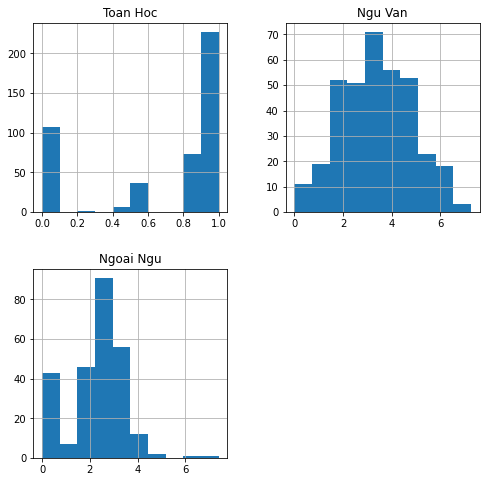

In [138]:
math_fail_df[["Toan Hoc", "Ngu Van", "Ngoai Ngu"]].hist(figsize=(8,8))
plt.show()

### Điểm liệt do môn Văn

Một điều đáng lưu ý là số lượng học sinh bị điểm liệt do môn Văn là khá nhiều

In [134]:
literature_fail_df = score_df[score_df["Ngu Van"] <= 1.0]
literature_fail_df

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
SBD,,,,,,,,,
51000649,1.00,NaN,NaN,NaN,NaN,NaN,3.50,6.25,NaN
28029710,0.00,2.6,1.8,NaN,NaN,NaN,1.75,3.50,5.5
6000140,0.50,3.4,NaN,NaN,NaN,NaN,3.75,5.50,NaN
6000141,0.50,2.4,NaN,NaN,NaN,NaN,2.75,3.00,NaN
6000138,0.75,2.2,NaN,NaN,NaN,NaN,2.25,4.00,NaN
...,...,...,...,...,...,...,...,...,...
26016571,0.25,2.0,NaN,NaN,NaN,NaN,1.75,2.25,NaN
26016627,1.00,2.6,NaN,NaN,NaN,NaN,3.25,2.50,NaN
26016643,1.00,3.0,NaN,NaN,NaN,NaN,2.50,3.50,NaN


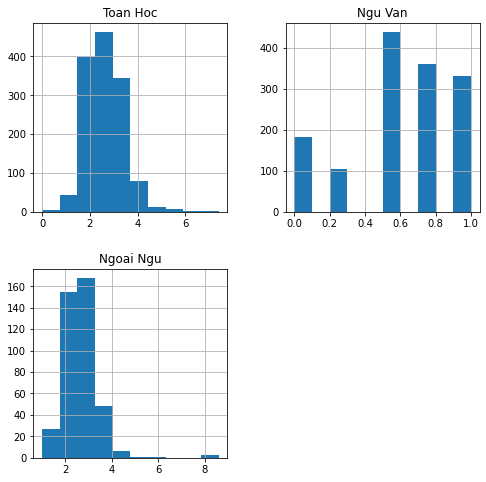

In [140]:
literature_fail_df[["Toan Hoc", "Ngu Van", "Ngoai Ngu"]].hist(figsize=(8,8))
plt.show()

Riêng môn Ngoại Ngữ, ta thấy có một chút khác biệt về phân phối. Chúng trải đều hơn. Có thể do học sinh không chú trọng môn học này lắm.

### Điểm liệt do môn Ngoại Ngữ

In [141]:
lang_fail_df = score_df[score_df["Ngoai Ngu"] <= 1.0]
lang_fail_df

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
SBD,,,,,,,,,
28026400,2.25,3.4,1.0,NaN,NaN,NaN,4.50,3.50,5.50
28027314,6.50,2.6,0.6,NaN,NaN,NaN,4.00,5.50,7.25
28027657,5.00,4.8,0.8,NaN,NaN,NaN,3.25,5.25,4.50
28027843,6.25,4.6,1.0,NaN,NaN,NaN,6.25,6.25,9.25
28029338,6.25,5.2,1.0,NaN,NaN,NaN,3.75,5.75,7.25
...,...,...,...,...,...,...,...,...,...
29003707,6.50,5.0,1.0,NaN,NaN,NaN,3.75,5.75,6.25
29003834,3.50,2.8,1.0,NaN,NaN,NaN,2.75,3.25,3.25
29004540,4.75,3.4,1.0,NaN,NaN,NaN,2.25,5.75,4.50


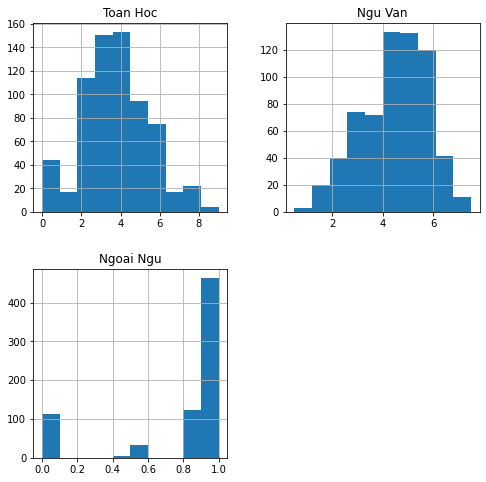

In [142]:
lang_fail_df[["Toan Hoc", "Ngu Van", "Ngoai Ngu"]].hist(figsize=(8,8))
plt.show()